In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
X_train_img = tf.image.resize(X_train, (229,229))
X_train_img = tf.image.grayscale_to_rgb(X_train_img)

In [6]:
X_train_img.shape

TensorShape([60000, 229, 229, 3])

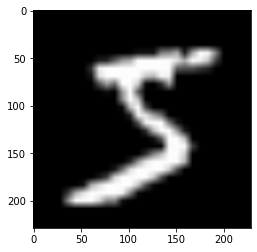

In [7]:
plt.imshow(X_train_img[0])

In [8]:
X_mini = tf.keras.applications.inception_v3.preprocess_input(X_train_img[:10000])

In [11]:
y_mini = y_train[:10000]

In [9]:
img_mini = (X_mini[0] + 1) / 2

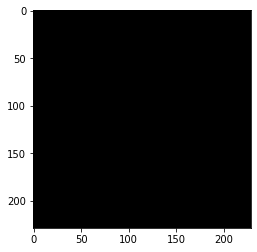

In [10]:
plt.imshow(img_mini)

In [18]:
model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
output = Flatten()(model.output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(10, activation='softmax')(output)
# define new model
model_full = Model(model.inputs, output)
# summarize
model_full.summary()

ValueError: The last dimension of the inputs to `Dense` should be defined. Found `None`.

In [ ]:
# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
model_full.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
model_full.fit(X_mini, y_mini, epochs=10, validation_split=0.3)